In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('EmailDataset.csv')
df.head()

,Label,Email
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah nt think goes usf lives around though


In [3]:
df.shape

(5565, 2)

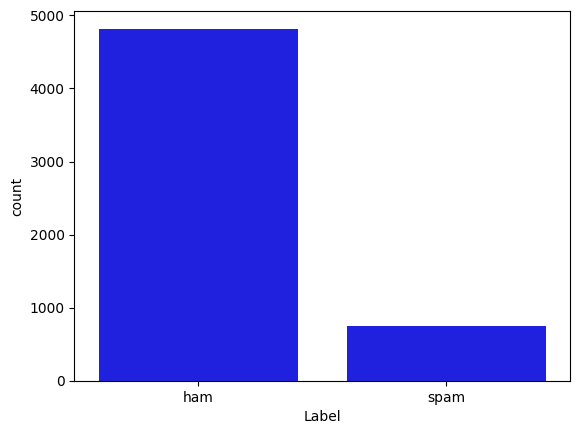

In [4]:
sns.countplot(x='Label', data=df, color='blue')
plt.show()

In [5]:
df['Label'] = df['Label'].map({'spam':1, 'ham':0})
df['Label']

0       0
1       0
2       1
3       0
4       0
       ..
5560    1
5561    0
5562    0
5563    0
5564    0
Name: Label, Length: 5565, dtype: int64

In [6]:
X = df['Email']
X.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4            nah nt think goes usf lives around though
Name: Email, dtype: object

In [7]:
y = df['Label']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Label, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [10]:
X_train.shape, y_train.shape

((4173,), (4173,))

In [11]:
X_test.shape, y_test.shape

((1392,), (1392,))

In [12]:
count = CountVectorizer()

X_train = count.fit_transform(X_train)
X_test = count.transform(X_test)

In [13]:
X_train, X_test

(<Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 35482 stored elements and shape (4173, 7749)>,
 <Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 10223 stored elements and shape (1392, 7749)>)

In [14]:
X_train.shape, X_test.shape

((4173, 7749), (1392, 7749))

In [15]:
params = {
    'C': [1e-4,  0.001, 0.01, 0.1, 1, 10]
}

In [16]:
from sklearn.model_selection import GridSearchCV

svc = SVC(class_weight={0:0.1, 1:0.5}, kernel='linear')
clf = GridSearchCV(svc, params, scoring='f1', cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 0.1, 1: 0.5}, kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.57742914, 0.54076759, 0.49018669, 0.26709771, 0.18049574,
        0.16749867]),
 'std_fit_time': array([0.02799241, 0.01361855, 0.00736849, 0.00557683, 0.0080517 ,
        0.01272876]),
 'mean_score_time': array([0.24590413, 0.23431293, 0.2242504 , 0.12776502, 0.07290419,
        0.06921506]),
 'std_score_time': array([0.00755275, 0.01275475, 0.00784963, 0.0039734 , 0.01572579,
        0.00689924]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10}],
 'split0_test_score': array([0.        , 0.        , 0.72      , 0.9039548 , 0.90962099,
        0.89855072]),
 'split1_test_score': array([0.        , 0.        , 0.72483221, 0.91316527, 0.9226361 ,
        0.90322581]),
 'split2_test_score': array([0.        , 0.        , 0.67123288, 0.90710383, 0.92997199,
  

In [18]:
res = clf.cv_results_
res['params']

[{'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}]

In [19]:
print(f'PARAMETERS:]\n')


res = clf.cv_results_
for i in range(len(res['params'])):
    print(f'C{res['params'][i]['C']}, Mean score : {res['mean_test_score'][i]}, Rank :{res['rank_test_score'][i]}')

PARAMETERS:]

C0.0001, Mean score : 0.0, Rank :5
C0.001, Mean score : 0.0, Rank :5
C0.01, Mean score : 0.7053550304924765, Rank :4
C0.1, Mean score : 0.9080746311676472, Rank :2
C1, Mean score : 0.9207430277336751, Rank :1
C10, Mean score : 0.9056769227924765, Rank :3


In [20]:
model = SVC(C=1, class_weight={0:0.1, 1:0.5}, kernel='linear')
model.fit(X_train, y_train)

SVC(C=1, class_weight={0: 0.1, 1: 0.5}, kernel='linear')

In [21]:
y_pred = model.predict(X_test)

In [22]:
print(f'F1 : {f1_score(y_test, y_pred)}')

F1 : 0.9265536723163842
